In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Reading all CPI CSV Data
bread_csv = pd.read_csv("bread_clean.csv")

coffee_csv = pd.read_csv("coffee_clean.csv")

eggs_csv = pd.read_csv("eggs_clean.csv")

#Find aggregate CPI data, stored as a dataframe, units are percent increase
agg_cpi_df = pd.concat([bread_csv, coffee_csv, eggs_csv]).groupby(level=0).mean()
agg_cpi_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2010.0,NaN,0.915002,-2.244567,-0.197901,-4.683961,0.254174,-0.294247,2.772519,7.499659,-5.134425,6.586959,0.219582
1,2011.0,2.781238,-3.381937,4.224444,3.317551,0.728083,0.912698,1.794906,1.752091,4.000727,-2.578325,-1.194416,0.013305
2,2012.0,1.594445,-2.676211,-0.441340,1.504306,-2.340447,-0.709814,0.973077,4.131549,-0.053682,2.894264,0.964955,0.373496
3,2013.0,-1.660972,-0.609682,0.924091,-2.076525,-0.999963,0.179683,-1.739263,-1.625791,0.544076,-0.561174,-0.116537,1.212811
4,2014.0,-0.258770,0.243087,0.374597,2.974705,-1.949347,-3.949789,3.405845,0.539220,0.372965,-1.277669,-0.587794,3.129825


In [52]:
# Find inflation gap data
inflation_gap = agg_cpi_df - 2

# Fix Years being Subtracted as well
inflation_gap["Year"] = inflation_gap["Year"] + 2

# Pure data DF that doesn't have the years
inflation_data = inflation_gap.iloc[:,1:]

In [20]:
# dictionary for finding the month six months later
six_months_later = {
    "Jan": "Jul",
    "Feb": "Aug",
    "Mar": "Sep",
    "Apr": "Oct",
    "May": "Nov",
    "Jun": "Dec",
    "Jul": "Jan",
    "Aug": "Feb",
    "Sep": "Mar",
    "Oct": "Apr",
    "Nov": "May",
    "Dec": "Jun"
}

first_half_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]

#data frame for the difference between a time and its equivalent six months later
first_half_delta_gap_df = pd.DataFrame()

for i in range(len(first_half_months)):
    #find which two months I have to subtract
    month_one = first_half_months[i]
    month_two = six_months_later[month_one]

    #subtract and divide to get the final result
    first_half_delta_gap_df[month_one] = (inflation_gap[month_one] - inflation_gap[month_two]) / (np.abs(inflation_gap[month_one]) + 1)

second_half_delta_gap_df = pd.DataFrame()

second_half_months = ["Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i in range(len(second_half_months)):
    month_one = second_half_months[i]
    month_two = six_months_later[month_one]

    second_half_delta_gap_df[month_one] = (inflation_gap[month_one] - inflation_gap[month_two].shift(-1)) / (np.abs(inflation_gap[month_one]) + 1)

In [21]:
# Change per unit change of interest rate in the gap to target rate of inflation rate (G)
delta_gap_df = pd.concat([first_half_delta_gap_df,second_half_delta_gap_df], axis=1)
print(delta_gap_df)

         Jan       Feb       Mar       Apr       May       Jun       Jul  \
0        NaN -0.890896 -1.857966  1.543676 -1.466811  0.012598 -0.933593   
1   0.553734 -0.804462  0.069382  2.544011  0.846201  0.430888  0.166345   
2   0.442080 -1.199349 -0.112647 -0.929306 -0.618937 -0.292012  1.299531   
3   0.016797  0.281496  0.183060 -0.298502 -0.220859 -0.366316 -0.312389   
4  -1.124539 -0.107415  0.000622  2.153422 -0.275097 -1.018680  1.454168   
5  -0.122227 -1.422283  0.253774  1.116328  0.008327  0.880947  1.986120   
6  -0.782322  0.284740 -0.571792 -0.353097 -0.232773 -0.788901 -2.922810   
7   1.503417 -0.721948 -0.561007 -0.767627  0.485970 -1.798411 -0.006409   
8  -1.112371  0.458001  1.293031  1.442663  0.162409 -0.808877  2.150016   
9  -0.735308  0.621778 -2.074083  0.184360 -1.204484 -0.890001  2.007694   
10  0.508957  1.288304  1.408698  0.922108 -0.765582 -0.476118 -0.551896   
11  0.412802  0.570628 -1.777451  0.364528  0.032496 -0.609084 -1.340526   
12 -0.262384

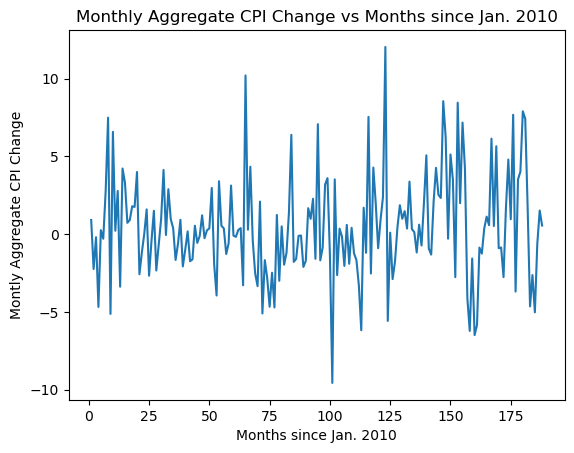

In [5]:
y = agg_cpi_df.iloc[:, 1:].to_numpy().flatten()

plt.plot(y)
plt.title("Monthly Aggregate CPI Change vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Montly Aggregate CPI Change")
plt.savefig("base_aggregate_inflation_data", dpi=300, bbox_inches="tight")
plt.show()

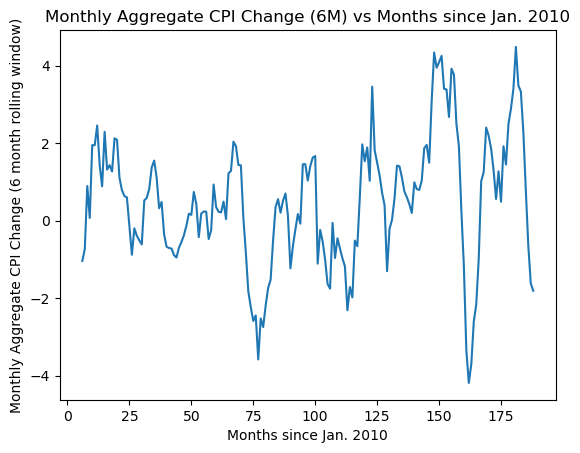

In [6]:
months = 6

rolling_averaged_agg_cpi = pd.Series(y).rolling(window=months).mean()

plt.plot(rolling_averaged_agg_cpi)
plt.title(f"Monthly Aggregate CPI Change ({months}M) vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel(f"Monthly Aggregate CPI Change ({months} month rolling window)")
plt.savefig(f"{months}_month_roll_aggregate_inflation_data", dpi=300, bbox_inches="tight")
plt.show()

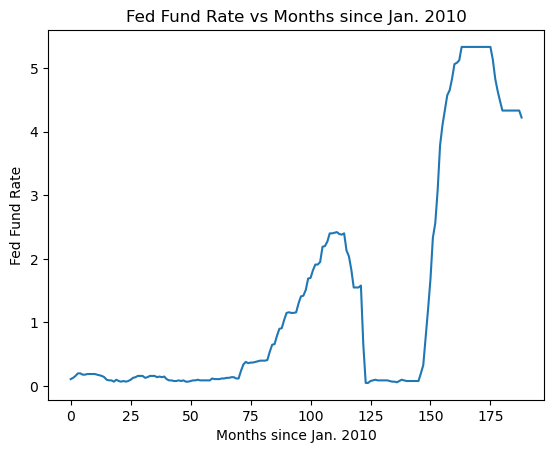

In [7]:
# Fed Fund Rate data
fed_interest_rate = pd.read_csv("FRED_Data.csv")

# Only looking at target scope
fed_interest_rate_df = fed_interest_rate[fed_interest_rate["Year"] >= 2010]

# Removes Years before graphing
plt.plot(fed_interest_rate_df.iloc[:, 1:].to_numpy().flatten())

plt.title("Fed Fund Rate vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Fed Fund Rate")
plt.savefig("fed_fund_rate_data", dpi=300, bbox_inches="tight")
plt.show()

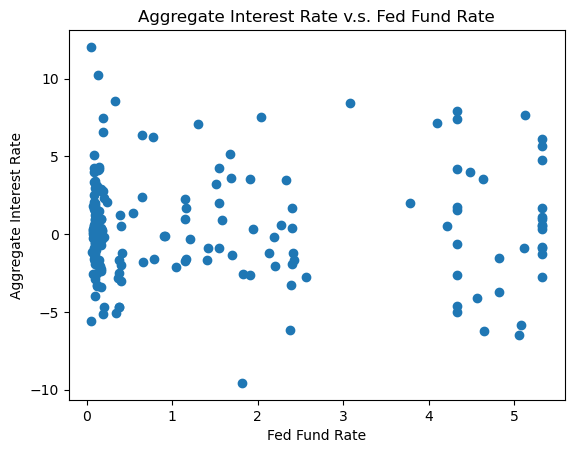

In [8]:
plt.scatter(fed_interest_rate_df.iloc[:, 1:], agg_cpi_df.iloc[:, 1:])
plt.title("Aggregate Interest Rate v.s. Fed Fund Rate")
plt.xlabel("Fed Fund Rate")
plt.ylabel("Aggregate Interest Rate")
plt.savefig("Scatterplot_of_Inflation_Rate_vs_Interest_Rate", dpi=300, bbox_inches="tight")
plt.show()

[0.16 0.2  0.2  0.18 0.18 0.19 0.19 0.19 0.19 0.18 0.17 0.16 0.14 0.1
 0.09 0.09 0.07 0.1  0.08 0.07 0.08 0.07 0.08 0.1  0.13 0.14 0.16 0.16
 0.16 0.13 0.14 0.16 0.16 0.16 0.14 0.15 0.14 0.15 0.11 0.09 0.09 0.08
 0.08 0.09 0.08 0.09 0.07 0.07 0.08 0.09 0.09 0.1  0.09 0.09 0.09 0.09
 0.09 0.12 0.11 0.11 0.11 0.12 0.12 0.13 0.13 0.14 0.14 0.12 0.12 0.24
 0.34 0.38 0.36 0.37 0.37 0.38 0.39 0.4  0.4  0.4  0.41 0.54 0.65 0.66
 0.79 0.9  0.91 1.04 1.15 1.16 1.15 1.15 1.16 1.3  1.41 1.42 1.51 1.69
 1.7  1.82 1.91 1.91 1.95 2.19 2.2  2.27 2.4  2.4  2.41 2.42 2.39 2.38
 2.4  2.13 2.04 1.83 1.55 1.55 1.55 1.58 0.65 0.05 0.05 0.08 0.09 0.1
 0.09 0.09 0.09 0.09 0.09 0.08 0.07 0.07 0.06 0.08 0.1  0.09 0.08 0.08
 0.08 0.08 0.08 0.08 0.2  0.33 0.77 1.21 1.68 2.33 2.56 3.08 3.78 4.1
 4.33 4.57 4.65 4.83 5.06 5.08 5.12 5.33 5.33 5.33 5.33 5.33 5.33 5.33
 5.33 5.33 5.33 5.33 5.33 5.33 5.13 4.83 4.64 4.48 4.33 4.33 4.33 4.33
 4.33 4.33 4.33 4.33 4.22  nan  nan  nan  nan  nan]


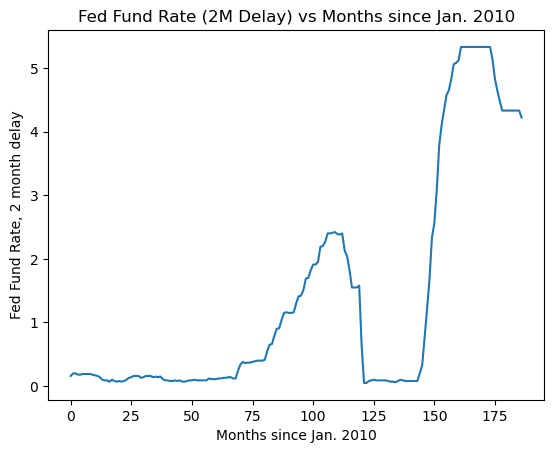

In [9]:
# AI Assisted Code
y_vals = fed_interest_rate_df.iloc[:, 1:].to_numpy().ravel()

# Shift X by two, so that we assume the Fed responds to the previous months' inflation rate.
y_shifted = np.roll(y_vals, -2)   # shift left by 2

# Last two values should be NaN, roll() moves the first two values to the end.
y_shifted[-2:] = np.nan

print(y_shifted)

plt.plot(y_shifted)
plt.title("Fed Fund Rate (2M Delay) vs Months since Jan. 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Fed Fund Rate, 2 month delay")
plt.savefig("2_month_delay_fed_fund_rate_data", dpi=300, bbox_inches="tight")
plt.show()

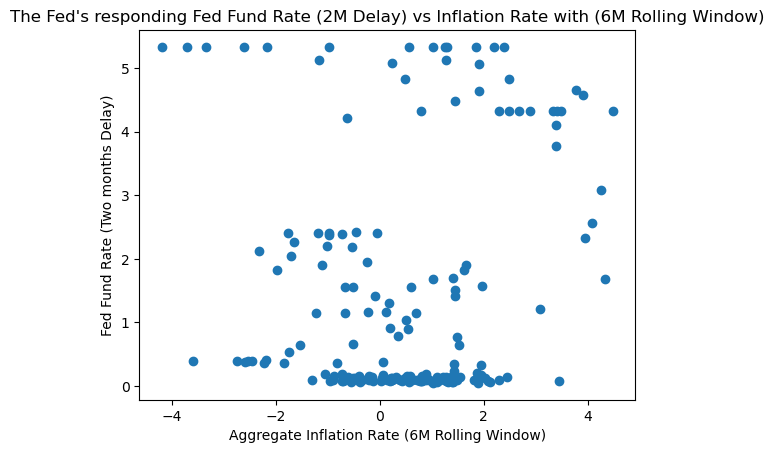

In [10]:
plt.scatter(rolling_averaged_agg_cpi, y_shifted)
plt.title("The Fed's responding Fed Fund Rate (2M Delay) vs Inflation Rate with (6M Rolling Window)")
plt.xlabel("Aggregate Inflation Rate (6M Rolling Window)")
plt.ylabel("Fed Fund Rate (Two months Delay)")
plt.savefig("Fed_Fund_Rate_as_response_to_Inflation_6_month_rolling", dpi=300, bbox_inches="tight")
plt.show()

In [12]:
# Regression Line
# Derivation - https://docs.google.com/document/d/1kzwPJW9lz2Li3BbyLpwohsugOb9nhutLRdQrFlAZcD0/edit?usp=sharing

# AI Assisted Code
mask = ~np.isnan(rolling_averaged_agg_cpi) & ~np.isnan(y_shifted)
x = rolling_averaged_agg_cpi.to_numpy()[mask]
y = y_shifted[mask]

# weights for each month
lambda_decay = 0.99
N = len(x)
w = lambda_decay ** (N - np.arange(N))

# Variables
wx = w * x
wy = w * y
wxx = w * x * x
wxy = w * x * y  

# Sums of Variables
W = np.sum(w)
Sx  = np.sum(wx) 
Sy  = np.sum(wy)
Sxx = np.sum(wxx)
Sxy = np.sum(wxy)

# Calculate a and b
b = (Sxy - ((Sx * Sy) / W)) / (Sxx - ((Sx*Sx) / W))
c = (Sy - b * Sx) / W

# Final Regression Line 
y_pred = b * x + c

In [13]:
# Values of b and c
print(f"b = {b}")
print(f"c = {c}")

b = 0.1525147246412545
c = 2.0746350292260236


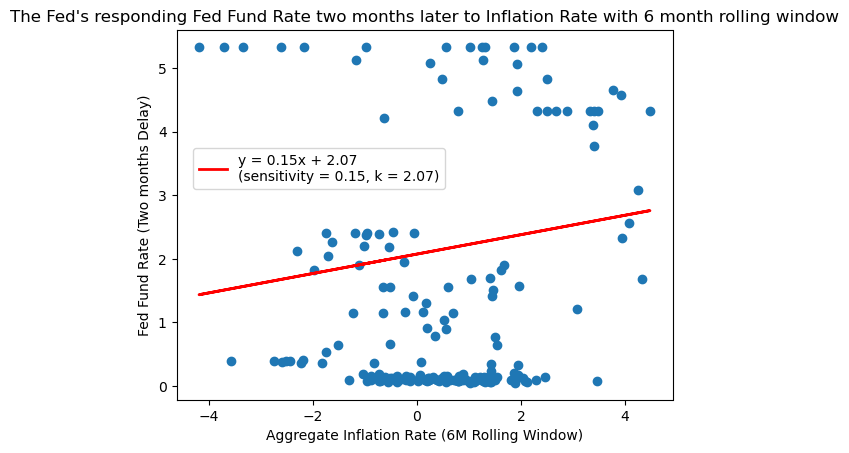

In [16]:
# Plot Regression in data
label_text = f"y = {b:.2f}x + {c:.2f}\n(sensitivity = {b:.2f}, k = {c:.2f})"
plt.plot(x, y_pred, color='red', linewidth=2, label=label_text)

# Plot Scatter
plt.scatter(rolling_averaged_agg_cpi, y_shifted)

# Graph
plt.title("The Fed's responding Fed Fund Rate two months later to Inflation Rate with 6 month rolling window")
plt.xlabel("Aggregate Inflation Rate (6M Rolling Window)")
plt.ylabel("Fed Fund Rate (Two months Delay)")

# Legend
plt.legend(loc="upper left", bbox_to_anchor=(0.02, 0.70))

# Saving picture of Graph
plt.savefig("Linear_Regression", dpi=300, bbox_inches="tight")

plt.show()

In [22]:
# Goal Alignment Metric
goal_alignment_df = 1 - np.abs(inflation_gap)/2
goal_alignment_df = goal_alignment_df.iloc[:,1:]
print(goal_alignment_df)

         Jan       Feb       Mar       Apr       May       Jun       Jul  \
0        NaN  0.457501 -1.122283 -0.098951 -2.341980  0.127087 -0.147124   
1   0.609381 -1.690968 -0.112222  0.341225  0.364041  0.456349  0.897453   
2   0.797222 -1.338105 -0.220670  0.752153 -1.170224 -0.354907  0.486539   
3  -0.830486 -0.304841  0.462046 -1.038263 -0.499981  0.089841 -0.869632   
4  -0.129385  0.121544  0.187299  0.512648 -0.974673 -1.974895  0.297077   
5  -0.046329 -0.087985  0.135529  0.193510 -1.646656 -3.107857  0.142675   
6  -2.553135 -0.836212 -1.418246 -2.337263 -1.241236 -2.358519  0.617721   
7  -1.196454 -0.891797 -0.795322 -0.053545 -0.043555 -1.054577 -0.857440   
8  -0.842331 -0.433290  0.401691  0.196011 -0.670137 -4.787548  0.236791   
9  -0.952711  0.205248 -0.618251 -0.835716 -1.648085 -3.093056  0.850786   
10 -0.452636  0.462650  0.808543 -4.025493 -2.792095  0.048166 -1.446443   
11  0.179687  0.310027  0.165801  0.062986 -0.589879  0.305685 -0.365341   
12 -0.135197

In [33]:
# Constants
coefficient = 4
constant_1 = 1
constant_2 = 1.1
constant_3 = 1.1

# Sensitivity Metric
S = b

# Goal Alignment Metric
A = goal_alignment_df

# 
delta_G = delta_gap_df

# Effectiveness Metric
E = coefficient * (S ** constant_1) * (constant_2 ** delta_G) * (constant_3 ** A)
E = E.to_numpy().flatten()

In [17]:
# Economic Damage Metric

# Read in data
df_unemployment = pd.read_csv("Unemployment_Data.csv")
df_GDP = pd.read_csv("gdp_growth_wide.csv")

In [18]:
df_unemployment.head()

,Month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
0,Aug 2005,4.9,4.3,4.4,16.1,4.2,9.7,3.7,5.8
1,Sept 2005,5.0,4.5,4.6,15.5,4.4,9.4,4.3,6.4
2,Oct 2005,5.0,4.3,4.5,16.1,4.4,9.1,3.2,6.0
3,Nov 2005,5.0,4.3,4.6,17.0,4.3,10.6,3.6,6.1
4,Dec 2005,4.9,4.3,4.4,14.9,4.2,9.2,3.8,6.1


In [19]:
df_GDP.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1992,NaN,0.467508,1.045959,-0.080365,-0.278450,1.497064,0.122013,-0.256694,0.412087,0.538811,0.230542,0.473471
1,1993,-0.388872,0.291372,-0.086514,0.127371,0.512512,0.218073,-0.361784,0.407088,0.756541,-0.066139,1.044562,0.259033
2,1994,-0.103194,0.574631,0.507751,0.142111,0.995586,0.043877,-0.118251,0.726943,-0.419215,0.924998,-0.107531,0.993853
3,1995,-0.033728,-0.784315,0.876990,-0.576606,0.323535,1.030894,-0.576541,0.600420,0.709252,-0.310598,0.045608,0.871886
4,1996,-0.162269,0.116779,0.722272,1.237015,-0.372391,0.467959,0.488983,0.092339,0.468149,0.817678,-0.043736,-0.281502


In [24]:
# Convert Month column to datetime (pandas infers the format)
df_unemployment['Month'] = pd.to_datetime(df_unemployment['Month'], errors='coerce')

# Filter from Jan 2010 onward
df_unemployment = df_unemployment[df_unemployment['Month'] >= '2010-01-01'].copy()

# Focus on Total unemployment
df_u = df_unemployment[['Month', 'Total']].copy()

C:\Users\thiya\AppData\Local\Temp\ipykernel_19732\2493313340.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_unemployment['Month'] = pd.to_datetime(df_unemployment['Month'], errors='coerce')


In [25]:
df_GDP = df_GDP.melt(
    id_vars="Year",
    var_name="Month",
    value_name="Rate"
)

# Step 2 — Convert "Year" + "Month" → datetime
df_GDP['Date'] = pd.to_datetime(
    df_GDP['Year'].astype(str) + df_GDP['Month'],
    format='%Y%b'
)

# Step 3 — Sort by date
df_GDP = df_GDP.sort_values('Date')

# Step 4 — Filter for 2010+
df_GDP = df_GDP[df_GDP['Date'] >= "2010-01-01"]

# Step 5 — Set Date as index
df_GDP = df_GDP.set_index('Date')

In [26]:
# Last 4 months not needed
df_GDP = df_GDP.head(len(df_GDP) - 4)
df_GDP

,Year,Month,Rate
Date,,,
2010-01-01,2010,Jan,0.618533
2010-02-01,2010,Feb,0.223400
2010-03-01,2010,Mar,0.589284
2010-04-01,2010,Apr,0.392215
2010-05-01,2010,May,-0.071365
...,...,...,...
2025-04-01,2025,Apr,0.790918
2025-05-01,2025,May,-0.481482
2025-06-01,2025,Jun,0.871015


In [47]:
# Economic Damage Metric
u = df_u["Total"].values
g = df_GDP["Rate"].values

data = pd.DataFrame({"Date": df_GDP.index,"u": u, "g": g})
u_clean = data["u"].values
g_clean = data["g"].values
dates_clean = data["Date"].values

# Constants
h = 6
a = 0.3
b = 0.5

# Compute differences
delta_u = u_clean[h:] - u_clean[:-h]       # change in unemployment
delta_g = g_clean[h:] - g_clean[:-h]

# Apply max(0, ...)
delta_u_pos = np.maximum(0, delta_u)
delta_g_pos = np.maximum(0, delta_g)

# Compute economic damage metric
U = a * delta_u_pos + b * delta_g_pos
U = np.append(U, [np.nan] * 10)

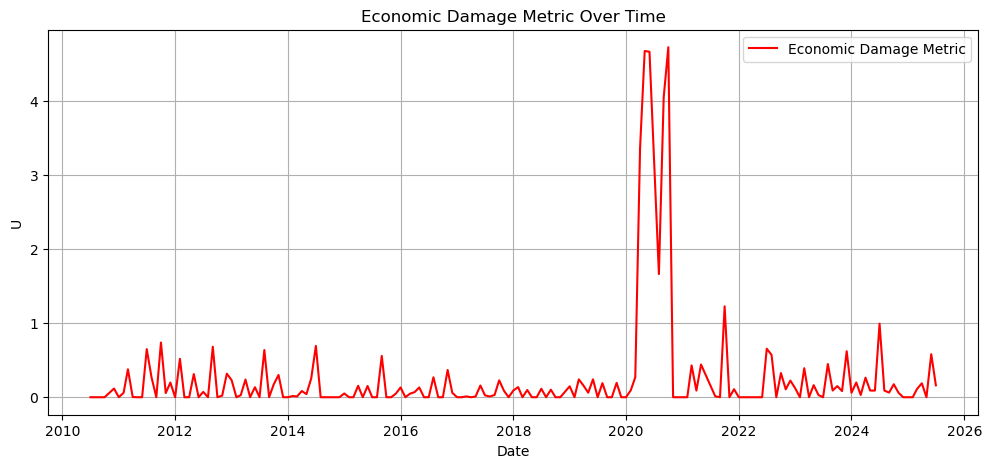

In [30]:
# Economic Damage Metric Graphed
plt.figure(figsize=(12,5))
plt.plot(dates_clean[h:], U, color='red', label='Economic Damage Metric')
plt.title("Economic Damage Metric Over Time")
plt.xlabel("Date")
plt.ylabel("U")
plt.grid(True)
plt.legend()
plt.savefig("economic_damage_graph", dpi=300, bbox_inches="tight")
plt.show()

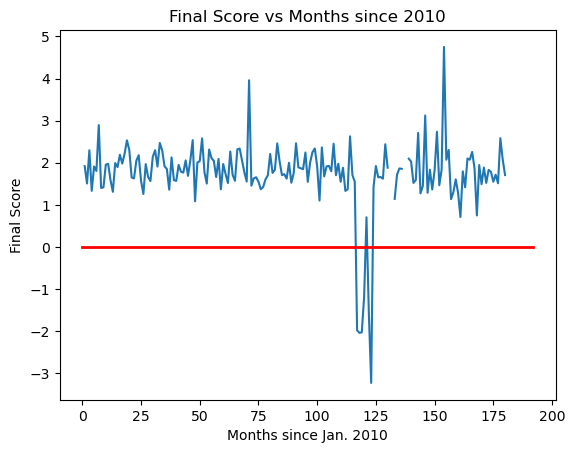

In [50]:
# Final Metric
final_metric = E - U

# Graph Final Metric
plt.plot(final_metric)
plt.plot(np.linspace(0, 192, 500), 0*np.linspace(0, 192, 500), color='red', linewidth=2)
plt.title("Final Score vs Months since 2010")
plt.xlabel("Months since Jan. 2010")
plt.ylabel("Final Score")
plt.savefig("final_score_graph", dpi=300, bbox_inches="tight")
plt.show()